Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [ ]:
import retinoto_py as fovea
args = fovea.Params(do_mask=True, num_epochs=10)
# args = fovea.Params(do_mask=True, subset_factor=5, do_full_training=False, num_epochs=15, lr=1e-4)
args

Params(image_size=224, do_mask=True, do_fovea=False, rs_min=0.0, rs_max=-7.5, padding_mode='zeros', seed=2025, batch_size=80, num_workers=1, in_memory=False, model_name='convnext_base', num_epochs=15, subset_factor=5, lr=0.0001, delta1=0.2, delta2=0.007, weight_decay=0.003, label_smoothing=0.05, do_full_training=False, shuffle=True, verbose=False)

# transfer learning of each network on the  masked dataset

In [11]:
%ls -ltr cached_data/20*

-rw-r--r--@ 1 laurent  staff  354499245  6 déc.  19:38 cached_data/20_model_name=convnext_base_dataset=bbox.pth
-rw-r--r--@ 1 laurent  staff       1807  6 déc.  19:38 cached_data/20_model_name=convnext_base_dataset=bbox.json


In [12]:
# %rm "cached_data/20_mls -ltrodel_name=convnext_base_dataset=bbox.lock"   # FORCING RECOMPUTE
# %rm "cached_data/20_*.lock"   # FORCING RECOMPUTE
%rm "cached_data/20_model_name=convnext_base_dataset=bbox.lock"   # FORCING RECOMPUTE
# %rm cached_data/20*

rm: cached_data/20_model_name=convnext_base_dataset=bbox.lock: No such file or directory


In [ ]:
model_name = args.model_name
for dataset in ['bbox']: # fovea.all_datasets:
    name = f'20_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/20_model_name=convnext_base_dataset=bbox.json
cached_data/20_model_name=convnext_base_dataset=bbox.pth: latest accuracy = 0.113
Training model convnext_base, file= cached_data/20_model_name=convnext_base_dataset=bbox.pth - image_size=224


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch=11/15:   0%|          | 0/625 [00:01<?, ?it/s]

Evaluating convnext_base:   0%|          | 0/125 [00:01<?, ?it/s]

## Model comparison

In [5]:
model_name = args.model_name
for dataset in ['bbox']: # fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'20_model_name={model_name}_dataset={dataset}.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

convnext_base bbox 9    0.1126
Name: acc_val, dtype: float64


In [6]:
results.T

,0,1,2,3,4,5,6,7,8,9
epoch,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
i_image,615280.000000,6.152800e+05,6.152800e+05,6.152800e+05,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
total_image,615280.000000,1.230560e+06,1.845840e+06,2.461120e+06,50000.000000,100000.000000,150000.000000,200000.000000,250000.000000,300000.000000
loss_train,0.367325,1.503114e-01,7.247278e-02,3.427956e-02,0.022540,0.021312,0.020166,0.019102,0.018111,0.017187
acc_train,0.183375,1.324600e-03,6.046028e-03,5.767618e-02,0.128580,0.131040,0.132460,0.131820,0.130700,0.131580
acc_val,0.002127,2.251244e-03,1.502488e-02,1.119403e-01,0.112500,0.112900,0.111900,0.112100,0.111300,0.112600
time,7061.567748,1.421054e+04,2.127824e+04,3.080804e+04,332.306991,565.880219,790.243177,1014.586353,1239.127110,1463.918579


In [7]:
results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
results_13

,model_name,do_mask,dataset,accuracy,wall_clock_time,total_parameters,trainable_parameters,total_layers
0,resnet18,True,full,0.515400,0.003884,11689512,11689512,68
1,resnet50,True,full,0.788860,0.005536,25557032,25557032,151
2,resnet101,True,full,0.801120,0.007081,44549160,44549160,287
3,resnet18,True,bbox,0.430846,0.004722,11689512,11689512,68
4,resnet50,True,bbox,0.721915,0.006415,25557032,25557032,151
5,resnet101,True,bbox,0.751393,0.007409,44549160,44549160,287
6,resnet18,False,full,0.691620,0.004008,11689512,11689512,68
7,resnet50,False,full,0.807600,0.005385,25557032,25557032,151
8,resnet101,False,full,0.817300,0.007105,44549160,44549160,287
9,resnet18,False,bbox,0.627786,0.004341,11689512,11689512,68


## Plot learning evolution

Load JSON from pre-trained resnet cached_data/20_model_name=convnext_base_dataset=bbox.json
cached_data/20_model_name=convnext_base_dataset=bbox.pth: latest accuracy = 0.113


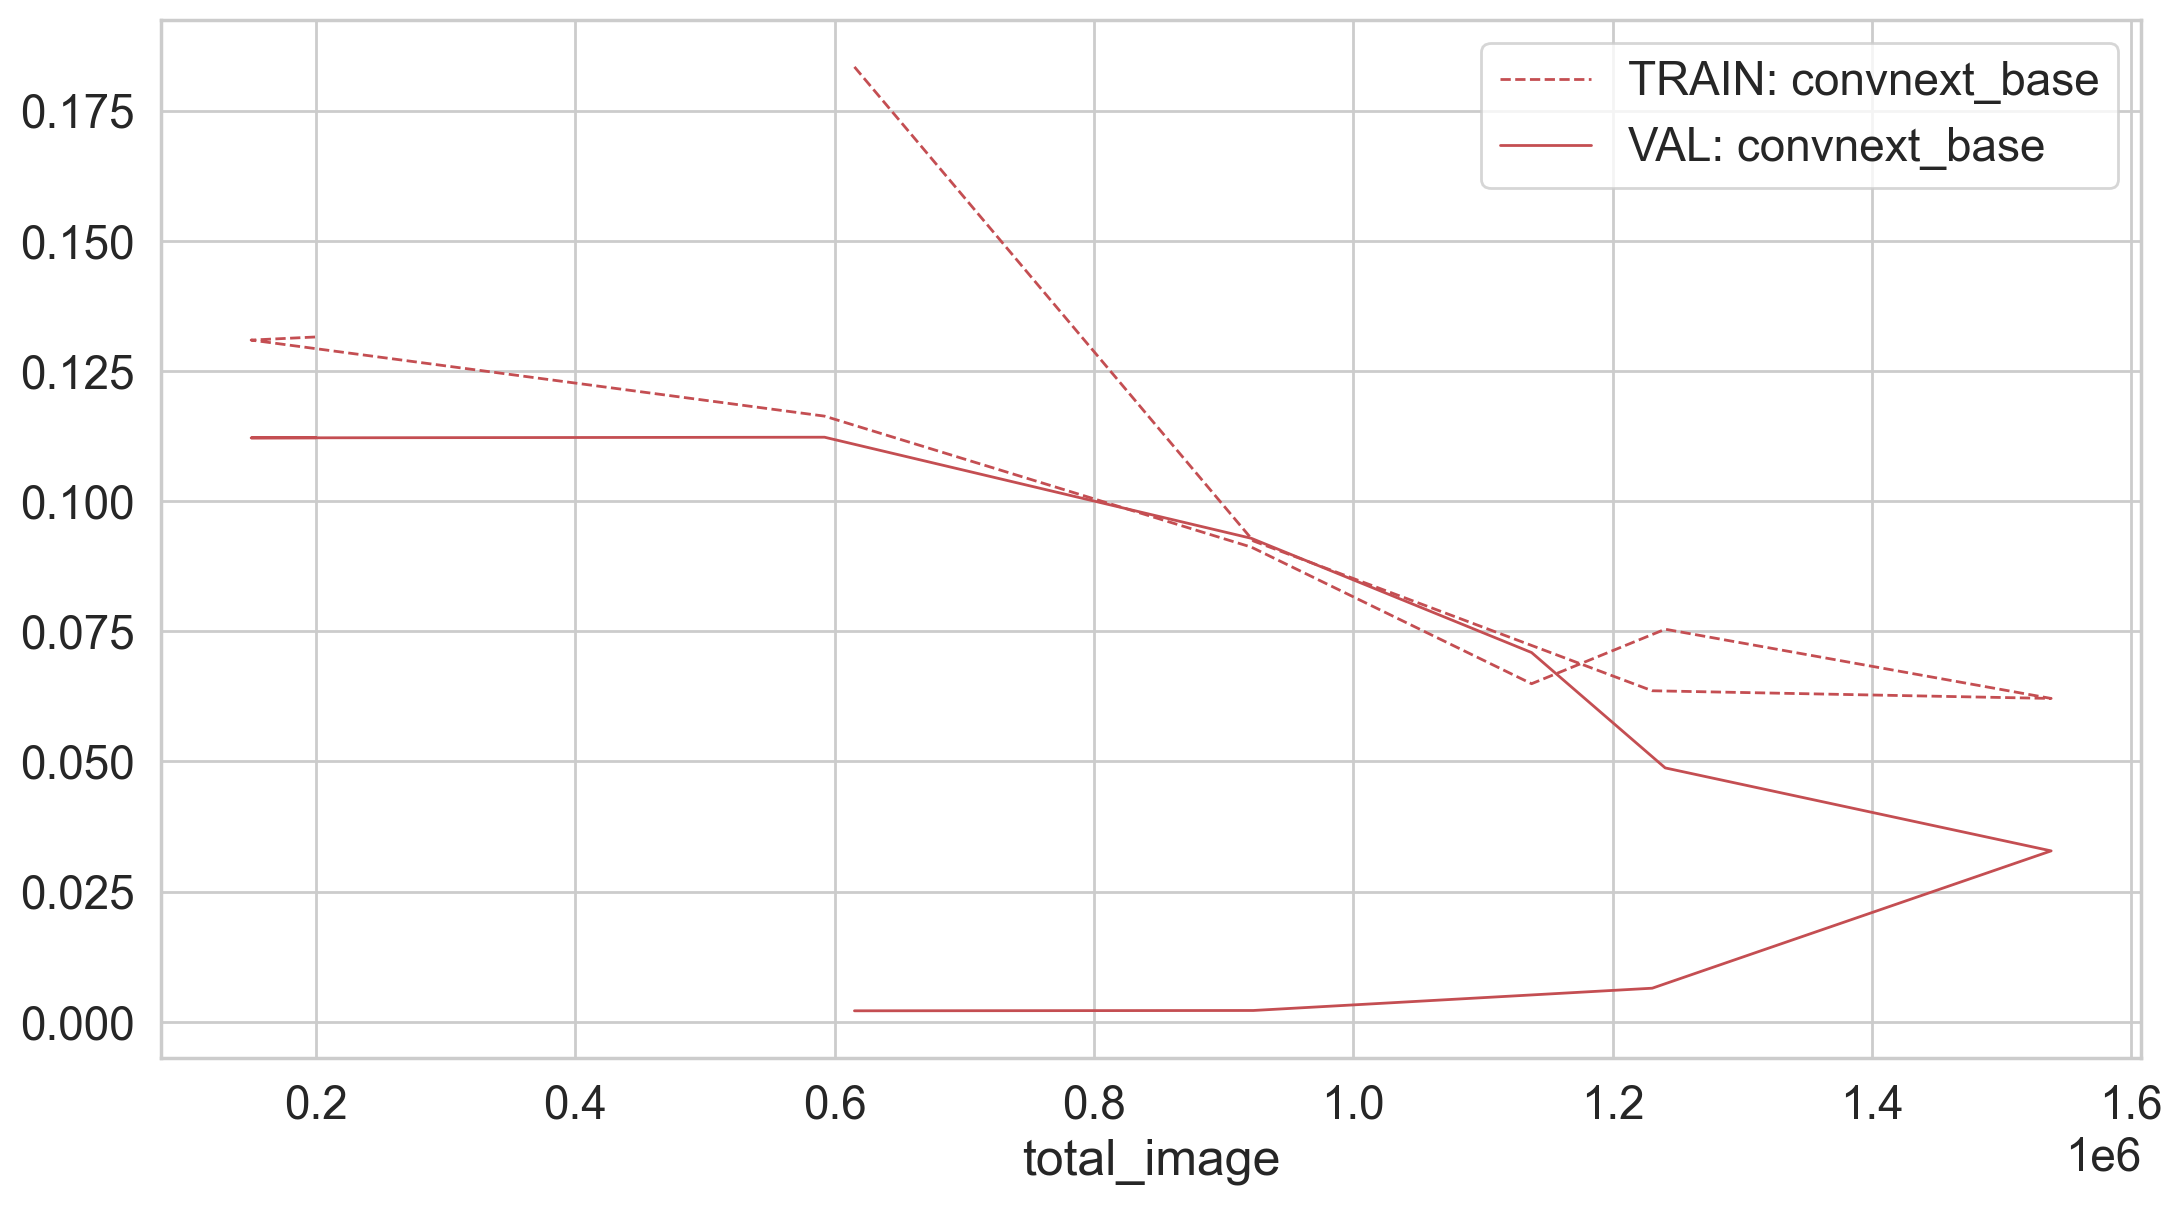

In [8]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']: # fovea.all_datasets:
    color = 'r'
    lw = 1

    name = f'20_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train_roll.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train_roll.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [9]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,acc_val,time
0,0,615280,615280,0.367325,0.183375,0.002127,7061.567748
1,1,615280,1230560,0.150311,0.001325,0.002251,14210.541431
2,2,615280,1845840,0.072473,0.006046,0.015025,21278.239955
3,3,615280,2461120,0.034280,0.057676,0.111940,30808.037847
4,4,50000,50000,0.022540,0.128580,0.112500,332.306991
5,5,50000,100000,0.021312,0.131040,0.112900,565.880219
6,6,50000,150000,0.020166,0.132460,0.111900,790.243177
7,7,50000,200000,0.019102,0.131820,0.112100,1014.586353
8,8,50000,250000,0.018111,0.130700,0.111300,1239.127110
9,9,50000,300000,0.017187,0.131580,0.112600,1463.918579
